### ORB feature detector on binary descriptor
[link to example](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_orb.html#sphx-glr-auto-examples-features-detection-plot-orb-py)

This example demonstrates the ORB feature detection and binary description algorithm. It uses an oriented FAST detection method and the rotated BRIEF descriptors.

Unlike BRIEF, ORB is camparatively scale and rotation invariant while still employing the very efficient Hamming distance metric form machting. As such, it is preferred for real-time applications.

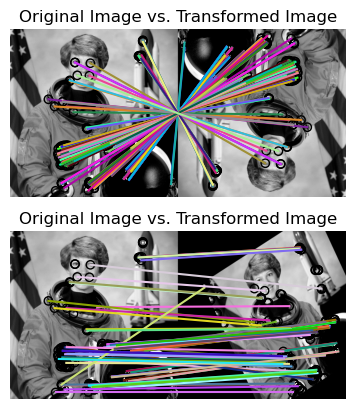

In [5]:
from skimage import data
from skimage import transform
from skimage.feature import (
    match_descriptors, corner_harris, corner_peaks, ORB, plot_matches
)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img_1 = rgb2gray(data.astronaut())
img_2 = transform.rotate(img_1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))
img_3 = transform.warp(img_1, tform)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img_1)
keypoints_1 = descriptor_extractor.keypoints
descriptors_1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_2)
keypoints_2 = descriptor_extractor.keypoints
descriptors_2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_3)
keypoints_3 = descriptor_extractor.keypoints
descriptors_3 = descriptor_extractor.descriptors

matches_1_with_2 = match_descriptors(descriptors_1, descriptors_2, cross_check=True)
matches_1_with_3 = match_descriptors(descriptors_1, descriptors_3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)
plt.gray()

plot_matches(ax[0], img_1, img_2, keypoints_1, keypoints_2, matches_1_with_2)
ax[0].set_axis_off()
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], img_1, img_3, keypoints_1, keypoints_3, matches_1_with_3)
ax[1].set_axis_off()
ax[1].set_title("Original Image vs. Transformed Image")

plt.show()